In [0]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import h5py
import numpy as np

# Opening the file as readonly. 
h5f = h5py.File('/content/drive/My Drive/AI_ML/CNN/Residency 9/SVHN_single_grey1.h5', 'r')

# Loading the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


In [0]:
h5f.close()

In [0]:
# Selecting a ssubeset of the data for computational convenience FOR THE KNN MODEL ONLY -
X_train=X_train[:10000]
y_train=y_train[:10000]
X_test=X_test[:8000]
y_test=y_test[:8000]

112.22085

In [0]:
# Eyeballing the data -
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)


In [0]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

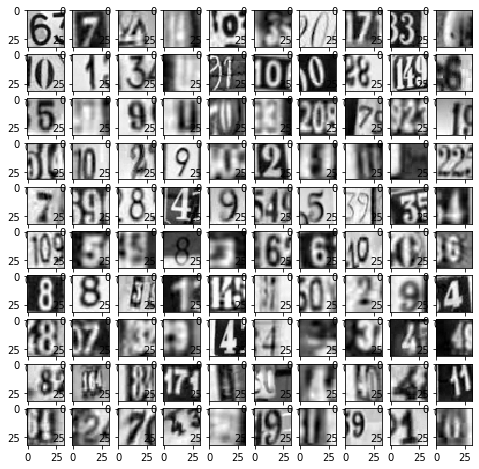

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = X_train[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

In [0]:
# Splitting the features into training and testing data and normalizing it -
X_train =(X_train/255.0).astype('float32')
X_test=(X_test/255.0).astype('float32')

In [0]:
print (X_train.min(),X_train.max(),X_train.mean(),X_train.std())
print (X_test.min(),X_test.max(),X_test.mean(),X_test.std())

0.0 0.9999 0.44026133 0.1950125
0.0 0.9999 0.44174716 0.1955974


In [0]:
# Reshaping the dataset so that it can be fed into the KNNClassifier library in scikit learn -
X1_train = X_train.reshape((X_train.shape[0],32*32))

In [0]:
X1_test=X_test.reshape((X_test.shape[0],32*32))

In [0]:
import pandas as pd 
from  sklearn.neighbors import KNeighborsClassifier

In [0]:
# Finding the optimal K - number from a range of 1 to 29.
from sklearn.metrics import accuracy_score
values=list(range(1,30))  
Finalscore=[]
k_neighbours=[]
for k in values: # Creating a for-loop to loop through the given k value range  

        NNH = KNeighborsClassifier(n_neighbors= k,weights='uniform',metric='euclidean')
        NNH.fit(X1_train, y_train)
        y_pred=NNH.predict(X1_test)
        accscore=accuracy_score(y_test,y_pred)
        Finalscore.append(accscore)
        k_neighbours.append(k)
        
            
        
MSE = [1 - x for x in Finalscore] # Calculating the misclassification error for each value of K.
data={"K_number":k_neighbours,"Misclass_error":MSE}  
noir=pd.DataFrame(data) # Converting the k neighbours and Misclassifciation error for each, to a dataframe.
noir.Misclass_error.min()

print ("The optimal k number and its Misclassifiaction error is-\n", noir.loc[noir["Misclass_error"]==noir.Misclass_error.min()])



The optimal k number and its Misclassifiaction error is-
     K_number  Misclass_error
28        29        0.573125


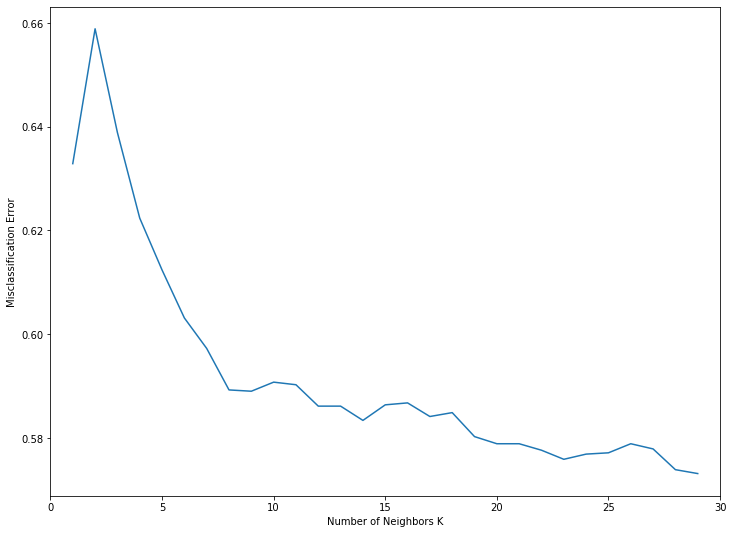

In [0]:
# Plotting the Misclassification error for each K number -
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.xlim(0,30)
plt.plot(k_neighbours,MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()


In [0]:
# Based on the above observations, the optimal K nearest neighbours is 29. 
# Using the optimal K value to build the final KNN model.  
NNH = KNeighborsClassifier(n_neighbors= 29,weights='uniform',metric='euclidean')
NNH.fit(X1_train, y_train)
y_pred=NNH.predict(X1_test)


In [0]:
from sklearn.metrics import confusion_matrix
print (accuracy_score(y_test,y_pred)) # Printing the accuracy score and the Confusion Matrix -
print (confusion_matrix(y_test,y_pred))

0.426875
[[486  36  26  37  23  28  67  25  29  50]
 [ 40 472  38  60  41  36  23  47  13  18]
 [ 60  95 345  70  41  29  22  72  24  32]
 [ 60 110  63 265  20  78  35  45  33  31]
 [ 61 104  32  56 441  25  49   9  19  16]
 [ 80  77  49 144  30 250  87  25  59  47]
 [160  57  30  44  66  55 287  17  61  28]
 [ 48  86  78  53  19  23  27 408  15  21]
 [139  58  30  68  50  61 124  17 225  49]
 [151  79  62  56  27  50  59  40  51 236]]


In [0]:
# Now applying the DNN model.
# ALL DATAPOINTS ARE USED FOR THIS MODEL.


# Reshaping the data so that it can be passed as input into the model.
X_train = X_train.reshape((X_train.shape[0],32,32,1))
X_test=X_test.reshape((X_test.shape[0],32,32,1))

In [0]:
# Centering and normalzing the images as a part of pre-processing.
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True)


In [0]:
datagen.fit(X_train)
datagen.fit(X_test)

In [0]:
# converting class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [0]:
import tensorflow as tf


In [0]:
#Initialising Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 32x32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,1)))

#Batch Normalisation of  the data
model.add(tf.keras.layers.BatchNormalization())

In [0]:
#Adding 1st hidden layer
model.add(tf.keras.layers.Dense(500, activation='relu'))

#Normalising the data
model.add(tf.keras.layers.BatchNormalization())

#Adding 2nd hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))

#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

#Adding 4th hidden layer
model.add(tf.keras.layers.Dense(60, activation='relu'))

#Adding 5th hidden layer
model.add(tf.keras.layers.Dense(30, activation='relu'))

#Adding output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))





In [0]:
# Compiling the model with an SGD optimizer with Nestrov momentum optimizing the weights and minimizing the categorical crossentropy loss function.
optim=(tf.keras.optimizers.SGD(learning_rate=0.01, nesterov=True))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
# Training and validating the model -
model.fit(X_train, y_train, batch_size=64,epochs=50,validation_data=(X_test,y_test))

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 3s 73us/sample - loss: 0.3182 - acc: 0.8963 - val_loss: 0.6856 - val_acc: 0.8277
Epoch 2/50
42000/42000 [==============================] - 3s 69us/sample - loss: 0.2614 - acc: 0.9138 - val_loss: 0.6452 - val_acc: 0.8447
Epoch 3/50
42000/42000 [==============================] - 3s 71us/sample - loss: 0.2391 - acc: 0.9204 - val_loss: 0.6831 - val_acc: 0.8364
Epoch 4/50
42000/42000 [==============================] - 3s 70us/sample - loss: 0.2230 - acc: 0.9252 - val_loss: 0.6665 - val_acc: 0.8467
Epoch 5/50
42000/42000 [==============================] - 3s 67us/sample - loss: 0.2239 - acc: 0.9272 - val_loss: 0.6506 - val_acc: 0.8459
Epoch 6/50
42000/42000 [==============================] - 3s 69us/sample - loss: 0.2142 - acc: 0.9286 - val_loss: 0.6717 - val_acc: 0.8462
Epoch 7/50
42000/42000 [==============================] - 3s 70us/sample - loss: 0.2177 - acc: 0.9278 - val_loss: 0.

In [0]:
# The above model shows a validation accuracy of 85.06 % , after running for 100 epochs (50 epochs run twice)

y_pred = model.predict_classes(X_test)
y_classes = [np.argmax(y, axis=None, out=None) for y in y_test]


In [0]:
# Printing the confusion matrix .

from sklearn.metrics import confusion_matrix
con_mat=confusion_matrix(y_classes,y_pred)
print(con_mat)

[[1631   29    9   14   19    9   26   27   19   31]
 [  24 1590   21   15   45   17   25   54   21   16]
 [  18   23 1589   20   30    7   11   48   21   36]
 [  25   29   33 1332   32  144   27   28   42   27]
 [  19   41   14   22 1608   13   30   19   16   30]
 [  10   18   10   45   12 1497   90   11   46   29]
 [  44   18   16   15   32   51 1555   15   69   17]
 [  25   55   35   11   16    8   11 1632    4   11]
 [  45   46   24   32   24   29  116   13 1441   42]
 [  62   30   25   28   20   45   22   24   48 1500]]


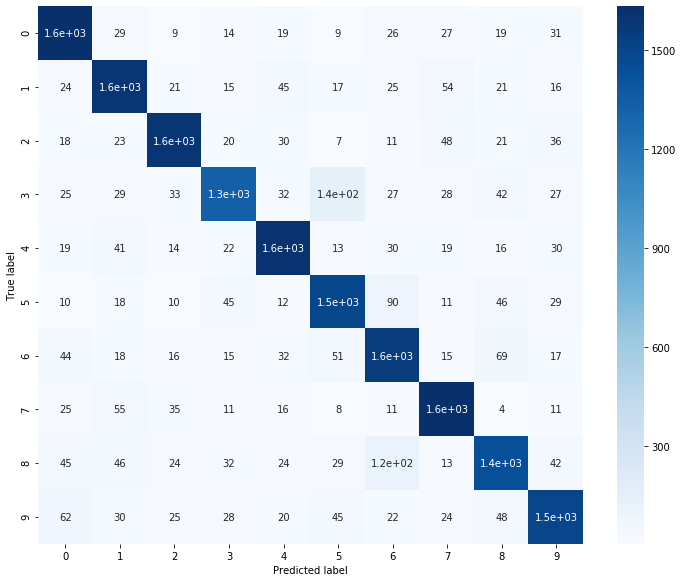

In [0]:
# Plotting the confusion matrix-
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
figure = plt.figure(figsize=(10, 8))
sns.heatmap(con_mat, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [0]:
#Differences and trade-offs between traditional and NN classifiers-
#1. The most important difference is that the DNN model is far superior to the KNN model.
#2. K-nearest neighbours requires us to find the most optimal neighbour, this is completely dependant on the range of values that we provide.
#   Finding the right neighbours is cumbersome especially estimating it with a massive dataset. Here we see misclassification steadily decreasing with increasing K numbers.
#   Perhaps choosing a K number between 100 to 200 neighbours would have yeilded the absolute optimal k number for the data,This would have to be computed with  the training, 
#   testing and the model would run with the whole dataset even during deployment. It is computationally taxing compared to the overall computation required for the DNN model.
#   Even with this dataset I was forced to run the model with a subset of the data as the colab IDE did not provide the optimal K number for the given range , 
#   even after many hours of processing.
#3. The DNN model aims to extract relavent features (i.e reducing the need for feature engineering) via the hidden layers and provided the model is optimally fit.
#   This generalises well, and the model performs very well during deployment. There is no machine learning per say with the KNN model , as it only classifies based on
#   the neighbours in the historical data, small changes to the feature space might severely impair the performance of the model and it might become stale faster compared 
#   to the DNN model.
#4.  Based on the confusion matrices of the KNN model and DNN model, DNN perfoms very well even in class level metrics. Even accounting for the fact that the DNN model had a 
#    a lot more data to work on. I ran the model with the same dataset provided to the KNN model and it showed accuracy of abour 75% for running the model for about 20 epochs.


In [0]:
######################%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%###########################

In [0]:
# The model below is beyond the purview of the questions asked in the project, I just ran the CNN model out of curiosity.

In [0]:
# Initializing the seqential model -
model = tf.keras.models.Sequential()


# Adding three convolutional layers with increasing depth , ReLU activation function applied to all Conv layers.
model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(32,32,1),name='conv_1'))
model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',name='conv_2'))
#model.add(tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu',name='conv_3'))

# Adding a dropout layer with 30 % droput threshold -
model.add(tf.keras.layers.Dropout(0.3,name='drop_1'))

# Adding a Pooling layer to reduce inputs to relevant dimensions-
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),name='max_1'))

# Flattening the Convolved/Pooled layers to 1D-
model.add(tf.keras.layers.Flatten())

# Adding Fully Connected layers with relU activation functions -
model.add(tf.keras.layers.Dense(150,activation='relu',name='dense_0'))
model.add(tf.keras.layers.BatchNormalization())

# Adding first Droput layer to the FC layers with a threshold of 50%.
model.add(tf.keras.layers.Dropout(0.5,name='drop_2'))

model.add(tf.keras.layers.Dense(100,activation='relu',name='dense_1'))

# Adding second Dropout layer with a 40% threshold -
model.add(tf.keras.layers.Dropout(0.4,name='drop_3'))

model.add(tf.keras.layers.Dense(50,activation='relu',name='dense_2'))
model.add(tf.keras.layers.Dense(20,activation='relu',name='dense_3'))


# Adding the output layer with number of classes as output and the activation function as softmax-
model.add(tf.keras.layers.Dense(10,activation='softmax',name='dense_4'))

In [0]:
# Compiling the model with an SGD optimizer with Nestrov momentum optimizing the categorical crossentropy loss function.
optim=(tf.keras.optimizers.SGD(learning_rate=0.01, nesterov=True))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
# Training and validating the model -
model.fit(X_train, y_train, batch_size=32,epochs=10,validation_data=(X_test,y_test))

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 8s 186us/sample - loss: 0.3118 - acc: 0.9060 - val_loss: 0.3419 - val_acc: 0.8993
Epoch 2/10
42000/42000 [==============================] - 8s 186us/sample - loss: 0.3121 - acc: 0.9046 - val_loss: 0.3266 - val_acc: 0.9014
Epoch 3/10
42000/42000 [==============================] - 8s 187us/sample - loss: 0.3104 - acc: 0.9057 - val_loss: 0.3251 - val_acc: 0.9019
Epoch 4/10
42000/42000 [==============================] - 8s 183us/sample - loss: 0.3002 - acc: 0.9090 - val_loss: 0.3305 - val_acc: 0.9030
Epoch 5/10
42000/42000 [==============================] - 8s 181us/sample - loss: 0.2988 - acc: 0.9087 - val_loss: 0.3452 - val_acc: 0.8977
Epoch 6/10
42000/42000 [==============================] - 8s 185us/sample - loss: 0.2935 - acc: 0.9087 - val_loss: 0.3322 - val_acc: 0.9002
Epoch 7/10
42000/42000 [==============================] - 8s 187us/sample - loss: 0.2962 - acc: 0.9100 - val_l

In [0]:
y_pred = model.predict_classes(X_test)

In [0]:
y_pred.shape

(18000,)

In [0]:
y_classes = [np.argmax(y, axis=None, out=None) for y in y_test]


In [0]:
from sklearn.metrics import confusion_matrix
con_mat=confusion_matrix(y_classes,y_pred)

In [0]:
print (con_mat)

[[1704   24    4    6    4    2   13    7   10   40]
 [  23 1694    9   10   37    9    2   19   17    8]
 [  13   34 1635   11   20    4    3   37   10   36]
 [   7   32   21 1488   10   78   11   14   42   16]
 [  11   52   18   10 1647   11    6    7   16   34]
 [   3    9   11   52   14 1620   25    5   14   15]
 [  35   15   11   20   25   79 1547    5   82   13]
 [  17   72   28   21   13    5    1 1638    5    8]
 [  21   32    7   27    8   26   29    4 1619   39]
 [  36   26   22   10   18   22    4   13   16 1637]]


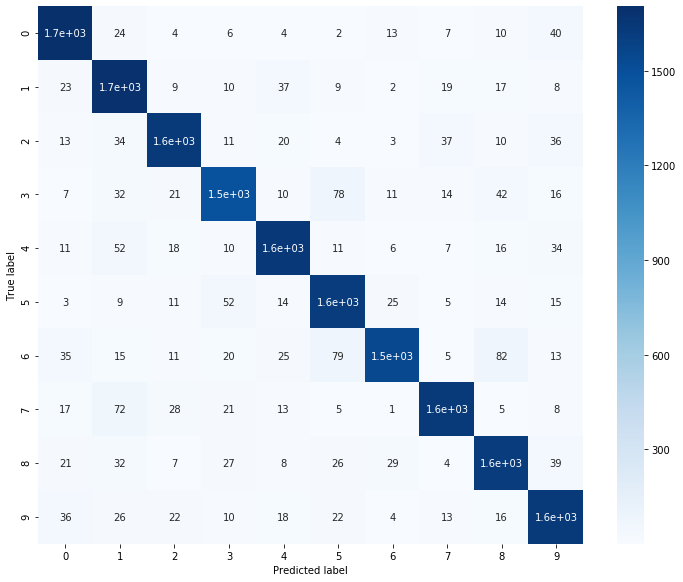

In [0]:
#%matplotlib inline
#import matplotlib.pyplot as plt
#import seaborn as sns
figure = plt.figure(figsize=(10, 8))
sns.heatmap(con_mat, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()